#Light Statistics

In the Hot Hand investigation, we compared the length of the longest run in the data for various players to the longest run in data generated in independent Bernoulli Trials with a given value of p.  If the player runs were too long or too short compared to the results of Bernoulli trials we could conclude the data was not randomly generated.  However, due to the variation in the length of the longest run in the randomingly generated data, “too long” or “too short” need be better defined.  This section will cover more about random variables and their distributions to bring more clarity to this.

##Random Variables

A Random Variable is a rule that assigns a number to each outcome of an experiment. There may be more than one random variable associated with an experiment.  For some random variables, the possible values of the variable can be separated and listed in either a finite list or an infinite list. These variables are called **discrete random variables**.  Some examples are shown
below:

|Experiment |Random Variable | X Possible values of X |
|-----------|----------------|------------------------|
|Roll a pair of six-sided dice| Sum of the numbers |{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}|
|Toss a coin 5 times| Number of tails| {0, 1, 2, 3, 4, 5}|
|Flip a coin until you get a tail| The number of coin flips| {1, 2, 3, . . . , }|
|Flip a coin 50 times| Longest run of heads| {0, 1, 2, 3, . . . , 50}|

A **continuous random variable** can assume any value between some interval.  Some examples shown below

|Experiment Random |Variable, X |
|------------------|------------|
|Choose an NFL Quarterback at random |Height |
|Choose an NCAA Shot Putter at random |Arm Length |
|Choose a Track and Field athlete at random |Their best time for 100 meters |

Continuous random and discrete random variables are analogous with linear and digital signals.

##Probability Distributions For Random Variables

For a discrete random variable with finite possible values,the probability that a specific value will be observed is equal to the sum of probabilites of the outcomes associated to that value.  This assignment of probabilities to each possible value of X is called the probability distribution of X.    

An experiment consists of flipping a coin 4 times and observing the sequence of heads and tails. The random variable X is the number of heads in the observed sequence. 


In [4]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_context('notebook', font_scale=1.25)

#create the sample space with 0's being Tails and 1's being Heads
a = np.array([0,1])
b = np.array([0,1])
c = np.array([0,1])
d = np.array([0,1])
sample_space = [[a0, b0, c0, d0] for a0 in a for b0 in b for c0 in c for d0 in d]
print("The sample space = {0}".format(sample_space))

The sample space = [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]


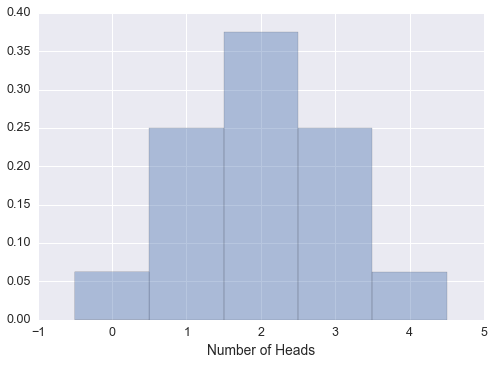

In [43]:
# determine the number of heads for each possible outcome
sample_space = np.array(sample_space)
num_heads = []

for outcome in sample_space:
    num_heads.append(outcome.sum())
num_heads = pd.Series(num_heads, name="Number of Heads")

# setup the number of bins for the plot
bins = [i for i in range(0,num_heads.max()+2)]

# plot the probability distrubution of heads
ax = sns.distplot(num_heads, bins=bins, kde=False, norm_hist=True, hist_kws = {'align': 'left'})


The above graph shows the number of heads on the bottom x-axis and the probability is is on the y-axis.  By Making all bars of equal width, we ensure that the graph adheres to the **area principle** in that the probability that any set of values will occur is equal to the area of the bars above those values. The total area of the distribution is 1.  As an example if we wanted to know the probability of having at least 2 or more heads we would add the probabilites of 2, 3, and 4.  This would be approximately 38% + 25% + 6% = 69%.

##Continuous Random Variables. 
The probability distribution of a continuous random variable cannot be represented in a table since the possible values of the variable cannot be separated. The distribution is represented using the graphical method as a continuous curve and is called a probability density function. Probabilities are calculated for intervals instead of particular values. The probability that the value of a random variable will fall in the interval [a, b], denoted $P(a ≤ X ≤ b)$ is given by the area under the probability
density function above that interval. The area under the entire probability density curve is 1

As an example we can look at the average rushing yard per game by running backs in 2014.

In [28]:
import os

basedir = os.getcwd()
filename = os.path.join(basedir, "data\\football.csv")

df = pd.read_csv(filename)          # read in the data
df = df.loc[:,'Player':'Y/G']      # grab columns we are interested in
df = df[df['Att']>100]              #only concern ourselves with players that have at least 100 carries
df.sort_index(by='Y/G', ascending=False, inplace=True)   # sort by yards per carry

display(df.head(5))      # display top 5


,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G
0,DeMarco Murray*+,DAL,26,RB,16,16,392,1845,13,51,4.7,115.3
6,Arian Foster*,HOU,28,RB,13,13,260,1246,8,51,4.8,95.8
2,Le'Veon Bell*+,PIT,22,RB,16,16,290,1361,8,81,4.7,85.1
1,LeSean McCoy*,PHI,26,RB,16,16,312,1319,5,53,4.2,82.4
3,Marshawn Lynch*,SEA,28,RB,16,14,280,1306,13,79,4.7,81.6


Above is a preview of the data.  The column that we will be interested in is Y/G (yards per game).  We will select that column and plot the probility density.

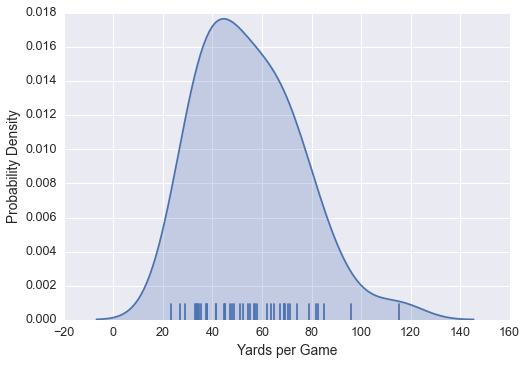

In [49]:
ypg = df['Y/G']
sns.distplot(ypg, hist=False, rug=True, kde_kws={'shade':True})

sns.axlabel('Yards per Game', 'Probability Density')

Looking at the above graph we can see that picking a player at random from the list we are about 50% likely that they average approximately 50 yards per game.  We check this below.

In [72]:
df1 = df[df['Y/G']>=50]        # create frame with players above 50 ypg
df2 = df[df['Y/G']<50]         # create frame with players below 50 ypg
list1 = []                     # used for creating a new frame
dict1 = {}                     # used for creating a new frame

dict1['Above 50 YPG'] = df1['Player'].count()   # get the player count
dict1['Below 50 YPG'] = df2['Player'].count()   #
list1.append(dict1)

display(pd.DataFrame(list1))

,Above 50 YPG,Below 50 YPG
0,23,20


##Expected Value of a Random Variable
Considering the experiment of flipping a coin 4 times and the random variable X which is equal to the number of heads in the sequence. The graph of the distribution is symmetric and centered at the value X = 2. This is the balance point of the graph and it gives us a measure of the center of the distribution. It is a very important and widely used statistic and is
related to our expectations for the average value of the variable over many trials of the experiment.

###Average of a set of observations
Given the following sequence of die rolls 
$$ 1, 6, 3, 2, 5, 2, 3, 2, 4, 6, 4, 6, 2, 6, 3, 6, 2, 6, 3, 5 $$
we can calculate the average by summing the outcome and dividing by the number or trials

In [81]:
outcomes = np.array((1, 6, 3, 2, 5, 2, 3, 2, 4, 6, 4, 6, 2, 6, 3, 6, 2, 6, 3, 5))(
average = outcomes.sum()/len(outcomes))
print("The mean equals {:1.2f}".format(average))

The mean equals 3.85


Alternatively, we can create a frequency table of the outcomes and calculate by the sum of the outcomes times relative frequency

$$ 1\frac{f_1}{20} + 2\frac{f_2}{20} + 3\frac{f_3}{20} + 4\frac{f_4}{20} + 5\frac{f_5}{20} + 6\frac{f_6}{20}$$

In [100]:
outcomes = pd.Series(outcomes)
print("Value, Freq")

value = outcomes.get_values()
freq = outcomes.keys()

mean=0

for v, f in zip(value, freq):
    mean = mean + v*f/20

display(pd.value_counts(outcomes, sort=False, ascending=True))
print("The mean equals {:1.2f}".format(average))


Value, Freq


1    1
2    5
3    4
4    2
5    2
6    6
dtype: int64

The mean equals 3.85


In a small set of data, the relative frequencies may not match the probabilities. However in a very
large set of data, the relative frequencies should match the probability of the outcome.  In the case of rolling a six sided die, the probability is 1/6 for any outcome. Thus for a large number (N) of trials, we expect the average number of observed numbers to be

$$ E(X) = x_1 p_1 + x_2 p_2 + x_3 p_3 + ... + x_n p_n = \mu  $$
 
$ x_1 = \text{Outcome x1} $

$ p_1 = \text{Probability of x1} $  and so on.

This is the expected value of X or $E(X)\text{ or }\mu $ and above is the general formula for the expected value for a discrete random variable and graphically it is the balance point of the distrubution.

Returning to the die rolling example we have the following:

$$ 1\frac{1}{6} + 2\frac{1}{6} + 3\frac{1}{6} + 4\frac{1}{6} +5\frac{1}{6} + 6\frac{1}{6} = 3.5 = \mu$$

###Expected Value of a Continuous Random Variable 
For a continuous random variable, X, integration can be used to calculate the expected value E(X), and can be thought of geometrically as the balance point of the probability density function. As well we can also interpret the expected value, E(X), as the number we would expect to get if we calculated the average of the observations of the variable X over many trials of the
experiment.

##Standard Deviation and Variance
A commonly used measure of variability in distributions of random variables is the standard deviation.
The square of the standard deviation, called the variance, is also commonly used. The variance
of a random variable can be viewed as the average squared distance from the mean or expected value of a
random variable over a large number of trials of the experiment. The standard deviation is the square root
of the variance. This may be viewed as an attempt to create a measure of deviation from the mean in the
original units in which the variable is measured.

$$ Variance = \sigma^2(X) = p_1(x_1 - \mu)^2 + p_2(x_2 - \mu)^2 + ... + p_n(x_n - \mu)^2 $$

and

$$ \text{Standard Deviation} = \sigma(X) = \sqrt{Variance} $$

Consider the following experiment

An experiment consists of flipping a coin 4 times and observing the sequence of heads and
tails. The random variable Z is the number of runs in the sequence. Find E(Z), and the standard deviation,
σ(Z)


In [26]:
# We can come to the answer by two different ways by figuring out probabilities of all possible outcomes or by simulation with
# a large number of trials

# define function for finding runs in a sample
def find_runs(sample):
    run= 0
    last= None
    for s in sample:
        if s != last:
            run = run + 1
            last = s
    
    return run

# MATH WAY FIRST

# first generate the sample space of all possible unique outcomes
sample_space = [[x1,x2,x3,x4] for x1 in (0,1) for x2 in (0,1) for x3 in (0,1) for x4 in (0,1)]

runs1 = []   # create empty list for runs

for outcome in sample_space:
    runs1.append(find_runs(outcome))

runs1 = np.array(runs1)
    
values, counts = np.unique(runs, return_counts=True)
probs = counts/len(runs)  # divide each count by the length for probability
mean = (values * probs).sum() # calclulate the mean or Ez

# calculate the variance

variance = (np.square(values - mean) * probs).sum()


std_calc = np.sqrt(variance)

# SIMULATION METHOD

# create a large number of trials for simulation
trials = [np.random.binomial(1, 0.5, 4) for i in range(5000)]   # 4 coin tosses 5000 times

runs2 = []   # create empty list for runs

for outcome in trials:
    runs2.append(find_runs(outcome))

runs2 = np.array(runs2)

mean_sim = runs2.mean()      # get the mean or expected value
std_sim = runs2.std()        # get the standard deviation

# PRINT OUT RESULTS

print('E(Z) and STD for calculation equals: {}, {}'.format(mean, std_calc))
print('E(Z) and STD for simulation equals: {}, {}'.format(mean_sim, std_sim))





E(Z) and STD for calculation equals: 2.5, 0.8660254037844386
E(Z) and STD for simulation equals: 2.51, 0.8592438536294571
